In [1]:
import os
import warnings
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import deepxde as dde

2024-12-04 22:56:58.546860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



Compiling model...
Building feed-forward neural network...
'build' took 0.037743 s

'compile' took 0.224302 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [4.00e+00, 3.65e-04, 1.62e+01]    [4.00e+00, 3.65e-04, 1.62e+01]    [1.00e+00]    
1000      [6.86e-04, 2.33e-08, 1.34e-07]    [5.80e-04, 2.33e-08, 1.34e-07]    [1.15e-03]    
2000      [1.89e-04, 9.14e-07, 3.36e-07]    [1.62e-04, 9.14e-07, 3.36e-07]    [1.21e-03]    
3000      [5.96e-05, 7.36e-12, 9.61e-10]    [4.75e-05, 7.36e-12, 9.61e-10]    [6.30e-04]    
4000      [2.29e-05, 1.45e-06, 5.75e-07]    [1.69e-05, 1.45e-06, 5.75e-07]    [3.80e-04]    
5000      [1.71e-05, 6.09e-08, 1.98e-08]    [1.40e-05, 6.09e-08, 1.98e-08]    [1.99e-04]    
6000      [1.60e-05, 1.71e-08, 1.30e-08]    [1.45e-05, 1.71e-08, 1.30e-08]    [3.02e-04]    
7000      [1.54e-05, 6.86e-09, 6.12e-09]    [1.50e-05, 6.86e-09, 6.12e-09]    [3.33e-04]    
8000      [1.62e-05, 3.76e-08, 1.

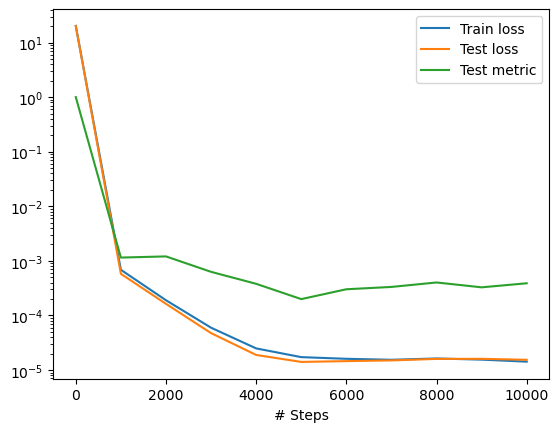

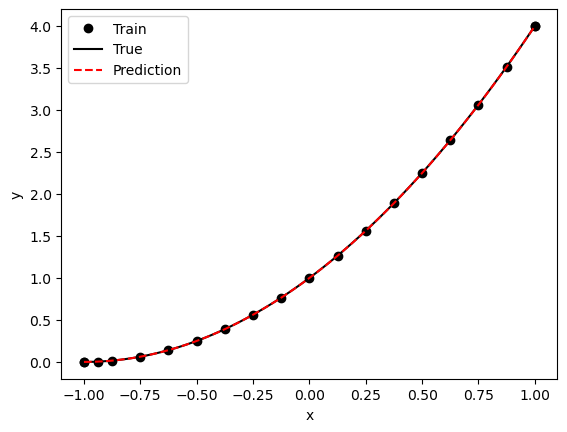

In [ ]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2


def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)


def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)


def func(x):
    return (x + 1) ** 2


geom = dde.geometry.Interval(-1, 1)
bc_l = dde.icbc.DirichletBC(geom, func, boundary_l)
bc_r = dde.icbc.NeumannBC(geom, lambda X: 2 * (X + 1), boundary_r)
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000, model_save_path='model1')

dde.saveplot(losshistory, train_state, issave=True, isplot=True)